In [1]:
# Phase 4: TF-IDF + SVD + Clustering
#Extract Dataset
import zipfile
import os

# Ensure your archive.zip is in the working directory
zip_file_path = "C:/Users/kondu/Downloads/alt.atheism.txt.zip"
extracted_folder = "20_newsgroups"

if not os.path.exists(extracted_folder):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)
# Step 1: Load and preprocess data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

data_dir = "20_newsgroups"

texts = []
labels = []        

In [3]:
#Read all .txt files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith(".txt"):
        label = filename.replace(".txt", "")
        with open(os.path.join(data_dir, filename), 'r', encoding='utf-8', errors='ignore') as file:
            content = file.read()
            paragraphs = [p.strip() for p in content.split('\n\n') if len(p.strip()) > 50]
            texts.extend(paragraphs)
            labels.extend([label] * len(paragraphs))
print(f"Loaded {len(texts)} pseudo-documents from 20 categories.")


Loaded 35128 pseudo-documents from 20 categories.


In [4]:

#TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = vectorizer.fit_transform(texts)
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (35128, 10000)


In [5]:
#Dimensionality reduction using Truncated SVD (LSA)
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)
print("Reduced shape after SVD:", reduced_matrix.shape)

Reduced shape after SVD: (35128, 2)


In [6]:
#Clustering using MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=20, random_state=42, batch_size=1000)
clusters = kmeans.fit_predict(tfidf_matrix)

In [7]:
#silhouette score
try:
    tfidf_sample, cluster_sample = resample(tfidf_matrix, clusters, n_samples=5000, random_state=42)
    silhouette = silhouette_score(tfidf_sample, cluster_sample)
except:
    silhouette = silhouette_score(reduced_matrix, clusters)

print("Silhouette Score (optimized):", silhouette)

Silhouette Score (optimized): 0.00917899502901191


In [9]:
#Visualization
df_vis = pd.DataFrame({
    'component_1': reduced_matrix[:, 0],
    'component_2': reduced_matrix[:, 1],
    'label': labels,
    'cluster': clusters

})

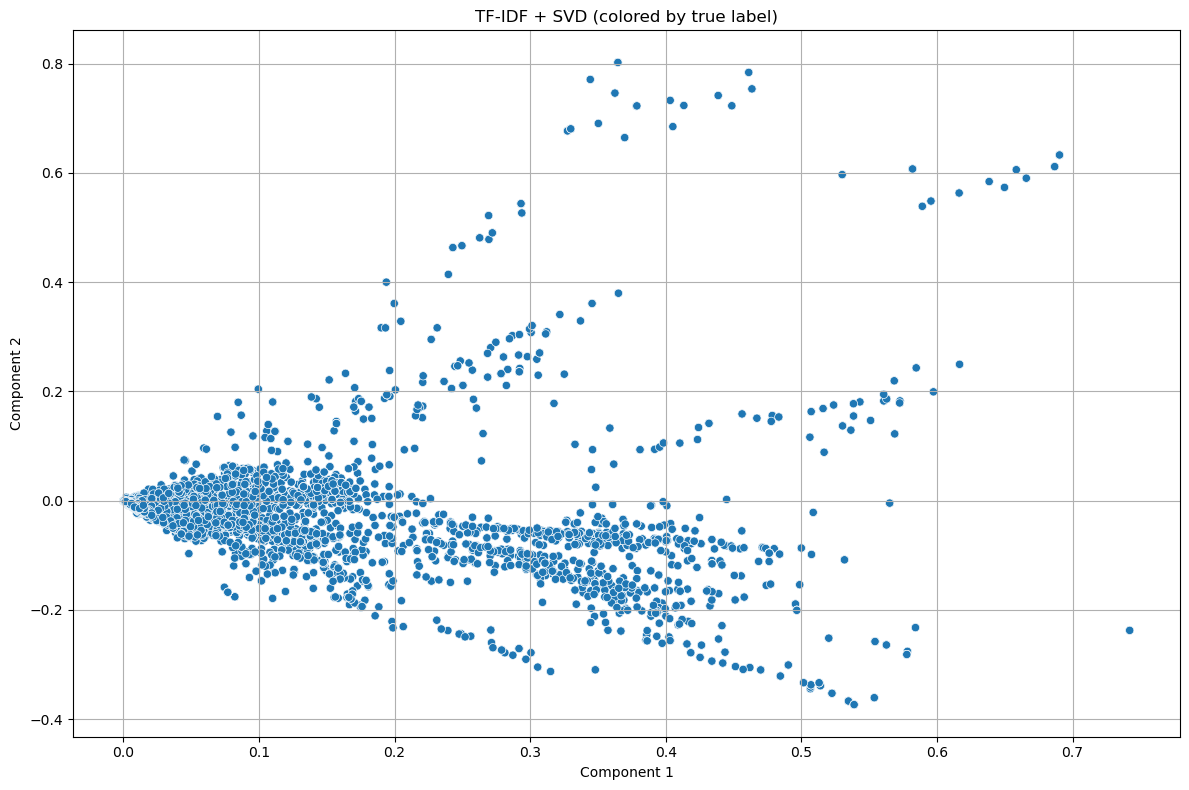

In [10]:
#Plot by true label
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_vis, x='component_1', y='component_2', hue='label', palette='tab20', legend=False)
plt.title('TF-IDF + SVD (colored by true label)')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("svd_by_label.png")
plt.show()

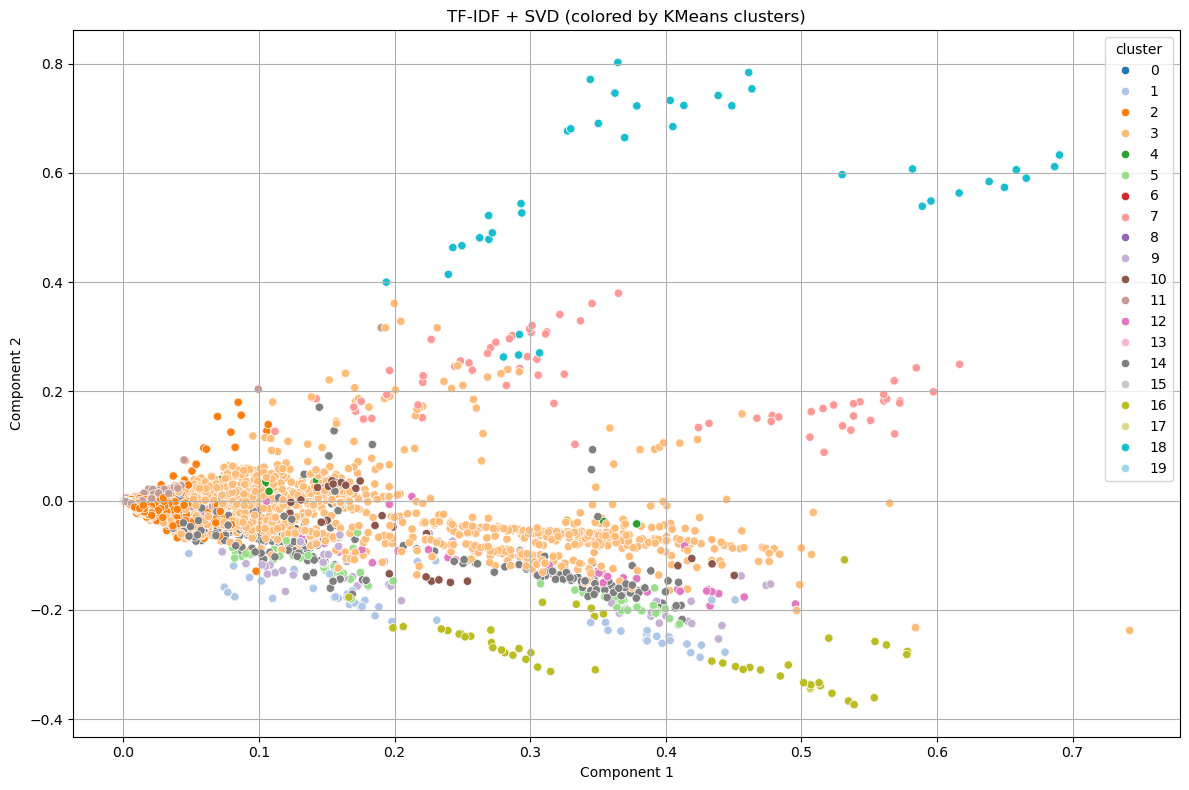

In [11]:
#Plot by KMeans cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_vis, x='component_1', y='component_2', hue='cluster', palette='tab20', legend='brief')
plt.title('TF-IDF + SVD (colored by KMeans clusters)')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("svd_by_cluster.png")
plt.show()

In [12]:
#Explanation
print("\nExplanation:")
print("TF-IDF creates a sparse, high-dimensional matrix representing document-term relationships.")
print("SVD reduces this dimensionality, enabling visualization and efficient computation.")
print("Clustering reveals latent structure in the data without using labels.")
print("This helps us understand topic groupings in an unsupervised manner.")


Explanation (3–4 lines):
TF-IDF creates a sparse, high-dimensional matrix representing document-term relationships.
SVD reduces this dimensionality, enabling visualization and efficient computation.
Clustering reveals latent structure in the data without using labels.
This helps us understand topic groupings in an unsupervised manner.
